In [1]:
import nltk
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

Tokenize the text in sentences and remove the stop words in each sentence.

In [2]:
filename = open('TrumpSpeech_20200618.txt', 'r')
stop_words = set(stopwords.words('english'))  
Lines = filename.readlines()
df_speech = []
for line in Lines:
    sentences = nltk.sent_tokenize(line)
    for sent in sentences:
        word_tokens = word_tokenize(sent)  
        filtered_sentence = [w for w in word_tokens if not w in stop_words]  
        x = ''
        for word in filtered_sentence:
            x +=' '+word
        df_speech.append(x)

In [3]:
df = pd.DataFrame(df_speech)
df.columns = ['text']
df['sentiment_blob'] = ''


In [4]:
def blob_sentiment(txt):
    sent = TextBlob(txt).sentiment.polarity
    return sent

In [5]:
df['sentiment_blob'] = df['text'].apply(lambda x : blob_sentiment(x))

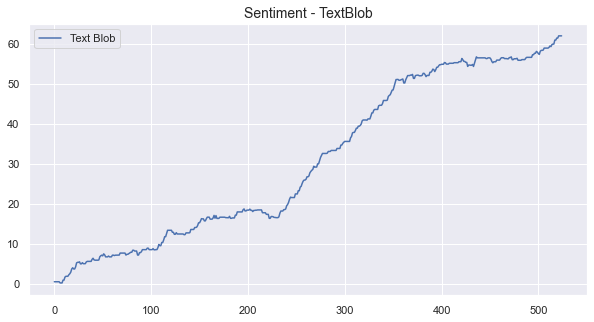

In [6]:
fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(np.arange(0,len(df)),df['sentiment_blob'].cumsum(),label='Text Blob')
ax.legend();
ax.set_title('Sentiment - TextBlob',fontsize=14);